**Using Sequential Neural Networks and Transfer Learning to Assess Biodiversity at Karoo National Park, South Africa**

**Introduction**

Camera traps offer an unprecedented method to gain a large amount of data on wildlife in a noninvasive manner. Camera traps are remotely triggered cameras that use motion sensors to take photos when animals walk by. Camera traps also present a great opportunity for harnessing big data in wildlife biology (Ahumada et. al. 2019). However, a limitation of this type of data is the time needed to identify the animals in the images. This is where convolutional neural networks come in as these machine learning algorithms can quickly identify large numbers of images. 

However, animals do not pose for pictures, and it is possible that the angle of the animal in a photo can affect the ability of the algorithm to identify the animal in question. This includes situations in which the animal is seen from the front or from the rear rather than from the side. In these situations, the same animal can look very different. In addition, sexual dimorphism can be a factor in identifying an animal in a camera trap image. This algorithm will attempt to discover if sexual dimorphism and the position of the animal can affect the ability of a convolutional neural network to identify a species. In addition, it is possible that different keras applications can have greater success than others in correctly classifying the different categories of animal involved with camera trap images.

The goal of this assignment is to determine if the position of the animal and the type of Keras architecture affects the ability of a CNN to identify an animal. Data will be obtained from three datasets, Snapshot Karoo: Season 1, Snapshot Camdeboo: Season 1 and Snapshot Kgalagadi: Season 1. These datasets are part of the Snapshot Safari program and are available through the Labeled Information Library of Alexandria (LILA BC). This lab will look at three categories of South African herbivore, the bull greater kudu (*Tragelaphus strepsiceros*), the cow eland (*Taurotragus oryx*) and mountain zebra (*Equus zebra*). Datasets will include a control dataset, in which all data for each category of antelope will be included in a single file, and an experimental dataset in which the data for each category is separated by front, rear and side views of the animal. The performance of both the control group and the experimental group will be assessed to determine the effectiveness of the algorithm.

In addition, the performance of the CNN on the control and experimental groups will be tested using a sequential neural network with several different Keras applications. These will include the ResNet101 architecture, the MobileNet architecture and the VGG16 architecture. The accuracy of the algorithm in identifying individual categories, a confusion matrix will also be produced to see which categories the algorithm has difficulty identifying. 

This lab will utilize code created by Iftekher Mamum (2019). This code was chosen for its ability to quickly iterate through epochs, its higher accuracy and the ease at which it can create and display a confusion matrix. 



In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend, models, layers, optimizers, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split # This method ended up not being used
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from IPython.display import display # This library ended up not being used.
from PIL import Image # This library was used to help view images
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # This library was used for data augmentation
import os, shutil # This libraries were used to create file connections
import cv2
np.random.seed(42)

import pandas as pd
import numpy as np
import itertools
import keras 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras import optimizers 
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math
import datetime
import time
import tensorflow as tf

In [ ]:
backend.clear_session()

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


**Methods:**

The final dataset was not a balanced dataset because most pictures of the animals were of the side view rather than views from the front or the rear. Diagonal animals are hard to classify so an effort was made to use pictures with a clear enough difference in the position of the animal. The dataset ended up having 788 total images. The experimental dataset ended up with fewer images, with 773, and it not clear why this is. Unfortunately, this error was discovered very late in the project’s process and there was not enough time to fix it. In the control dataset, the cow eland had 277 training images, 69 validation images and 86 test images for 432 images total. The bull greater kudu had 257 training images, 64 validation images and 80 test images for 401 images total. The data for the mountain zebra 254 training images, 64 validation images and 80 testing images. The experimental dataset included separate categories for the side, front and rear views of the animal. The side view of the cow eland included 182 training images, 46 validation images and 57 test images for a total of 285 images. The front view of the cow eland had 57 training images, 14 validation images and 18 testing images for a total of 89 images. The rear view of the cow eland had 37 training images, 9 validation images and 12 testing images for a total of 58 images. The side view of the bull greater kudu had 182 training images, 46 validation images and 57 test images for 285 total images. The front view had 46 training images, 11 validation images and 14 testing images for 71 total images. The rear view had 26 training images, 8 validation images and 10 testing images for a total of 44 total images. The mountain zebra’s side view had 165 training images, 41 validation images and 51 testing images for 257 total images. The front view of the mountain zebra had 48 training images 13 validation images and 15 testing images with a total of 75 images. The mountain zebra’s rear view had 28 training images, 7 validation images and 9 testing images. The data was divided by a 64%/16%/20% train/validation/test split.

The model created by Iftekher Mamun (2019) resizes the images to a size of 224 by 224 pixels, an image size chose was also to make the model compatible with the VGG16 architecture that would be used by its convolutional neural network. and converts images into a numpy array which is loaded into a bottleneck file for the training, validation and testing data to use. This numpy array is built from the number associated with each pixel in the photo. The data generators then prepare the data for the convolutional network and most importantly create the labels needed for the confusion matrix to work. This is the key difference between Mamun’s code and the code I originally created, as this was the code that finally allowed me to create the labels needed to build the confusion matrix. The matrix needs a set of easily accessible labels to compare the to the model’s predictions. The model does this by converting the numpy array used in the bottleneck file into a categorical variable that can be used for the labels. Basically, it is a set of dummy variables used to create labels for the machine learner.

The model was originally designed to run with 7 epochs and a batch size of 50 (Mamun 2019). However, the number of epochs was increased to 30 in this experiment, and the batch size reduced to 10 as the datasets used were smaller than the animal-10 dataset from Kaggle. The architecture used for the project was the VGG16 algorithm.




In [ ]:
base_dir = '/gdrive/My Drive/Regis/Karoo/Exp_Data_Slim/'

In [ ]:
# In the original code by Mamun et. al. (2019) this was the default height and width for images
img_width, img_height = 224, 224

# This code creates the bottleneck file to process the images to a size usable by the VGG116 algorithm
top_model_weights_path = '/gdrive/My Drive/Regis/Karoo/bottleneck_fc_model_exp.h5/'

# These are the links to the training, validation and testing datasets
train_data_dir = '/gdrive/My Drive/Regis/Karoo/Exp_Data_Slim/Train'
validation_data_dir = '/gdrive/My Drive/Regis/Karoo/Exp_Data_Slim/Val'
test_data_dir = '/gdrive/My Drive/Regis/Karoo/Exp_Data_Slim/Test'

# Epochs and Batch Size
epochs = 30 
batch_size = 10 

In [ ]:
vgg16 = applications.VGG16(include_top=False, weights='imagenet')

datagen = ImageDataGenerator(rescale=1. / 255)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# This code generates the training data
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

nb_train_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_train = int(math.ceil(nb_train_samples / batch_size))

bottleneck_features_train = vgg16.predict_generator(generator,
                                                    predict_size_train)

np.save('bottleneck_features_train.npy', bottleneck_features_train)
end = datetime.datetime.now()
elapsed = end-start
print ('Time: ', elapsed)

Found 773 images belonging to 9 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:07:38.266877


In [ ]:
#This code generates the validation Data
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

nb_val_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_val = int(math.ceil(nb_val_samples / batch_size))

bottleneck_features_val = vgg16.predict_generator(generator,
                                                    predict_size_val)

np.save('bottleneck_features_val.npy', bottleneck_features_val)
end = datetime.datetime.now()
elapsed = end-start
print ('Time: ', elapsed)

Found 194 images belonging to 9 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:02:00.555726


In [ ]:
# This code generates the test data
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

nb_test_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_test = int(math.ceil(nb_test_samples / batch_size))

bottleneck_features_test = vgg16.predict_generator(generator,
                                                    predict_size_test)

np.save('bottleneck_features_test.npy', bottleneck_features_test)
end = datetime.datetime.now()
elapsed = end-start
print ('Time: ', elapsed)

Found 243 images belonging to 9 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:02:25.704806


In [ ]:
# This code generates the training data 
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=False)

nb_train_samples = len(train_generator.filenames)
num_classes = len(train_generator.class_indices)

# This code will load the converted images for the training data from the bottleneck file
train_data = np.load('bottleneck_features_train.npy')

# This code generates the labels for the training data
train_labels = train_generator.classes

# This code converts the training labels into a categorical class
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 773 images belonging to 9 classes.


In [ ]:
# This code generates the validation data
validation_generator_top = datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=False)

nb_val_samples = len(validation_generator_top.filenames)
num_classes = len(validation_generator_top.class_indices)

# This code will load the converted images for the validation from the bottleneck file, create labels and convert them into a categorical class the confusion matrix can use
val_data = np.load('bottleneck_features_val.npy')
val_labels = validation_generator_top.classes
val_labels = to_categorical(val_labels, num_classes=num_classes)

Found 194 images belonging to 9 classes.


In [ ]:
# This code generates the testing data 
test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=False)

nb_test_samples = len(test_generator.filenames)
num_classes = len(test_generator.class_indices)

test_data = np.load('bottleneck_features_test.npy')
test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 243 images belonging to 9 classes.


In [ ]:
categories = test_generator.class_indices
print(categories)

{'Eland': 0, 'Eland_Front': 1, 'Eland_Rear': 2, 'Kudu_Bull': 3, 'Kudu_Bull_Front': 4, 'Kudu_Bull_Rear': 5, 'Mountain_Zebra': 6, 'Mountain_Zebra_Front': 7, 'Mountain_Zebra_Rear': 8}


**Creating the Confusion Matrix**

Like the model originally created for this project, Mamun (2019) used a CNN called a sequential neural network. This used transfer learning to incorporate the VGG16 architecture. The initial layers forming the top of the model was set to false to avoid incorporating it into the model, and the weights were set to ‘imagenet’ as per Mamun (2019). The model flattened the data and included three hidden layers. The first two use a with 100 nodes and the second with 50 nodes, and both use a LeakyRelu activation function. The model incorporates two dropout layers, one with a dropout of 0.5 and one with a dropout of 0.3. A softmax activation function was used on the final hidden layer as it is a classification-based model (Chollet 2018).

In [ ]:
# Convolutional Neural Network 
start = datetime.datetime.now()
model = Sequential()
model.add (Flatten (input_shape=train_data.shape[1:]))
model.add(Dense (100, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout (0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit(train_data, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(val_data, val_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
    val_data, val_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/30
78/78 [==============================] - 4s 35ms/step - loss: 2.1767 - acc: 0.2640 - val_loss: 1.5971 - val_acc: 0.4691
Epoch 2/30
78/78 [==============================] - 2s 29ms/step - loss: 1.6439 - acc: 0.4609 - val_loss: 1.4951 - val_acc: 0.4897
Epoch 3/30
78/78 [==============================] - 2s 29ms/step - loss: 1.5584 - acc: 0.4591 - val_loss: 1.3461 - val_acc: 0.5619
Epoch 4/30
78/78 [==============================] - 2s 29ms/step - loss: 1.4123 - acc: 0.5429 - val_loss: 1.3591 - val_acc: 0.5309
Epoch 5/30
78/78 [==============================] - 2s 28ms/step - loss: 1.2255 - acc: 0.5755 - val_loss: 1.3440 - val_acc: 0.5979
Epoch 6/30
78/78 [==============================] - 2s 29ms/step - loss: 1.2044 - acc: 0.6097 - val_loss: 1.3338 - val_acc: 0.5464
Epoch 7/30
78/78 [==============================] - 2s 29ms/step - loss: 0.9590 - acc: 0.6772 - val_loss: 1.3140 - val_acc: 0.5722
Epoch 8/30
78/78 [==============================] - 2s 30ms/step - loss: 0.8433 - a

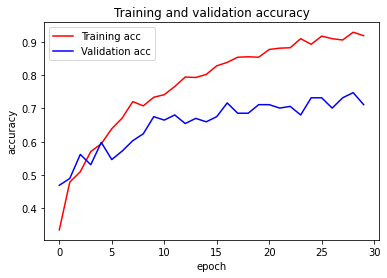

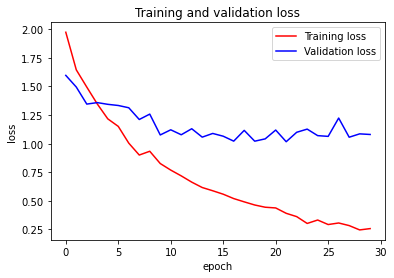

In [ ]:
# Creating graphs for the training and validation loss and accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
# Generating the test data
model.evaluate(test_data, test_labels)

8/8 [==============================] - 0s 7ms/step - loss: 0.8383 - acc: 0.7984


[0.838300883769989, 0.798353910446167]

In [ ]:
# Creating Predictions
preds = np.round(model.predict(test_data),0)
print('rounded test_labels', preds)

rounded test_labels [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
animals = ['Eland', 'Eland_Front', 'Eland_Rear', 'Kudu_Bull', 'Kudu_Bull_Front', 'Kudu_Bull_Rear', 'Mountain_Zebra', 'Mountain_Zebra_Front', 'Mountain_Zebra_Rear']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=animals )
print(classification_metrics)

                      precision    recall  f1-score   support

               Eland       0.74      0.93      0.82        57
         Eland_Front       0.73      0.61      0.67        18
          Eland_Rear       0.86      0.50      0.63        12
           Kudu_Bull       0.92      0.81      0.86        57
     Kudu_Bull_Front       0.83      0.71      0.77        14
      Kudu_Bull_Rear       0.78      0.70      0.74        10
      Mountain_Zebra       0.85      0.88      0.87        51
Mountain_Zebra_Front       0.88      0.47      0.61        15
 Mountain_Zebra_Rear       1.00      0.56      0.71         9

           micro avg       0.82      0.78      0.80       243
           macro avg       0.84      0.69      0.74       243
        weighted avg       0.83      0.78      0.80       243
         samples avg       0.78      0.78      0.78       243



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Creating the Confusion Matrix**

In Iftekher Mamun’s code for creating the confusion matrix was the main reason why it was chosen. The code by Mamun (2019) begins the process of creating the confusion matrix. This means that the code must be converted from a numpy array into a set of categorical variables that can be used in a data frame. This creates a column of variables which show the correct identity of the category. In addition, the predictions must also be converted into a confusion matrix. Like the labels they are in dummy format, so they are also converted from an array to a data frame. By comparing the data frames for the labels and results, Matplotlib can construct the confusion matrix. 



In [ ]:
# Converting the labels from a numpy array into a dataframe
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
# Converting the predictions created by the model into a dataframe
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
# Building a confusion matrix that will compare the dataframes of the labels to the dataframe of the predictions
confusion_matrix = confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
# Allows the results of the confusion matrix to be normalized
#'"prints pretty confusion metric with normalization option "'
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print("Normalized confusion matrix")
  else: 
    print('Confusion matrix, without normalization')

# printing the confusion matrix

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label') 

Normalized confusion matrix


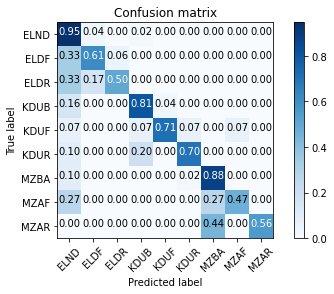

In [ ]:
plot_confusion_matrix(confusion_matrix, ['ELND', 'ELDF', 'ELDR', 'KDUB', 'KDUF', 'KDUR', 'MZBA', 'MZAF', 'MZAR'], normalize=True)

**Control Summary:** 

The control model ran for 30 epochs and achieved a validation accuracy of 91.88% and a loss of 0.271. Overall, the training and validation accuracy of the model began to plateau around 19 epochs. The testing accuracy for the 93.1% and a loss of 0.3344. The model produced a precision of 0.92 for the eland, 0.90 for the kudu bull and 0.97 for the mountain zebra. Overall, 92% of the images for the eland were classified correctly. 7% of the images were classified as a kudu bull and 1% were classified as a zebra. 95% of the images for the kudu bull were classified correctly, with 4% classified as the eland and 1% classified as a mountain zebra. 93% of the images for the mountain zebra were classified correctly, while 5% were classified as elands and 3% were classified as a bull kudu. 


**Experimental Summary**

The experimental data produced a validation accuracy of 74.23% and a loss of 1.164. This model appeared to plateau in accuracy and loss at around 25 epochs, but this may reflect a local minimum. With the experimental data, the model produced a test accuracy of 78.19% and a loss of 0.8606. For the eland, the model produced a precision of 0.84 for the side view, 0.60 for the rear view and 0.78 for the front view. For the greater kudu bull, the model produced a precision of 0.85 for the side view, 0.82 for the rear view and 0.86 for the front view. For the mountain zebra, the model produced a precision of 0.81 for the side view, 0.75 for the front and 1.00 for the rear. 

**Images of the Eland**

The confusion matrix revealed that the algorithm correctly identified the side view of the animal more frequently than the front and rear views. The model correctly identified approximately 82% of the photos for the side view of the of the eland, with 9% being identified as front views of the eland, 4% as rear views of the eland and 5% being identified as a bull kudu. The Model correctly identified 67% of the images of the front view of the eland correctly, with 33% being misidentified as the side view. The rear view of the eland fared even worse with only 58% of the images being correctly identified. 25% of these images were misidentified as the rear view and 17% were misidentified as the side view. 

**Images of the Bull Kudu**

The model correctly identified 89% of the photos of the side view of the bull kudu correctly. 5% were misclassified as the side view of an eland, 4% were misclassified as the front view and 2% were misclassified as the side view of a mountain zebra. 64% of the images of the front view of the bull kudu were correctly identified. In contrast, 14% misclassified as the side view of an eland, 14% were misclassified as the side view of the bull kudu and 7% were misclassified as the rear view of the bull kudu. 60% of the images for the rear view of the bull kudu were identified correctly. 30% of these images were misclassified as the side view of the bull kudu and 10% classified as the side view of the eland. 


**Images of the Mountain Zebra**

The model correctly identified 90% of the images for the side view of the mountain zebra. 2% were misclassified as the front view of the zebra, 2% were misclassified as the side view of a bull kudu and 6% were misclassified as the side view of an eland. The algorithm particularly struggled with the front and side views of the mountain zebra, achieving an accuracy of 40% for the front and only 33% for the rear. 33% of the images for the front view of the zebra were misclassified as the front view of the zebra while 27% were surprisingly misclassified as the side view of the eland. 56% of the rear view of the zebra were misclassified as the side view of the zebra while 11% were misclassified as the front view. 

**Conclusions**

Overall, the algorithm proved to be much more capable of identifying different animals than predicted, and creating different categories for the different angles of the animal actually decreased the accuracy of the model, with images frequently being misclassified as the wrong angle of the animal. This was particularly true of side views, which never achieved an accuracy above 67% (eland front view) and were as low as 40% (mountain zebra front view) and 33% (mountain zebra rear view). When the model misclassified an image as the wrong species, it was usually as the side view of an eland. This included 27% of the images of the front view of a zebra, 14% of the images of the side view  of the bull kudu and 10% of the images of the front view of the bull kudu were misclassified as the side view of an eland. 

One of the issues that this experiment had was that the data was very unbalanced and this may have impacted the results. Originally image augmentation was supposed to be used with the model. It would have a rotation range of 40, a width shift of 0.25, a height shift of 0.25, flipped images and zoomed in images. However, this code actually produced a lower accuracy with the control data leading to the assumption that it would not improve the accuracy of the test. However, this failed to consider that the data was highly unbalanced in the control group. In hindsight, the purpose of the experiment was to see if the algorithm improves with the different angles, not to generate the most accuracy algorithm possible. It is highly probable that the small sample sizes for the rear and side views may have contributed to their failure in the algorithm.


**Bibliography**

Mamun, Iftekher (April 7th, 2019) *A Simple CNN: Multi Image Classifier*. [Towards Data Science] Retrieved from: https://towardsdatascience.com/a-simple-cnn-multi-image-classifier-31c463324fa

Chollet, Francois (2018) Deep Learning with Python. Manning Publications, Shelter Island, NY.

